In [1]:
import os
import numpy as np


def find_best(checkpoint, task):
    log_files_a = os.listdir(checkpoint+"/")
    log_files_b = []

    for file in log_files_a:
        file_split = file.split(".")
        if(file_split[-1]=="txt"):
            file_split_2 = file_split[0].split("_")
            if(file_split_2[0]=="session" and file_split_2[1]==str(task) ):
                f = np.loadtxt(checkpoint+"/"+file, skiprows=1)
                best_acc = max(f[-1,-1], f[-1,-2])
                if(file_split_2[-1]!="RT"):
                    return best_acc
                    
    return best_acc


In [229]:
a = np.loadtxt("/raid/brjathu/meta_two/idatasets/train.txt", dtype="object")

In [181]:
# q = os.listdir("/raid/brjathu/Datasets/MS1M/V1/msra")
import os.path
root = "/raid/brjathu/Datasets/MS1M/V1/msra"
c = 0
for i in a:
    path = i[0].split("/")
    if( os.path.exists(root + "/m." + path[2].split(".")[1] + "/") ):
        c += 1
#     print(c , root + "/m." + path[2].split(".")[1] + "/" + "/".join(path[3:])  )
print(c)

266834


In [189]:
import numpy as np

a = np.loadtxt("/raid/brjathu/Datasets/MS1M/V1/msra_lmk", dtype="object")

In [ ]:
from collections import Counter

Counter(a[:,1])


In [190]:
meta_data = a

In [224]:
import random
classes = list(range(85000))
random.shuffle(classes)
root = "/raid/brjathu/Datasets/MS1M/V1/"


folders = 0

train_imgs_all = []
val_imgs_all = []
selected_classes = []
for k,v in Counter(meta_data[:,1]).items():
    if(v>45):
        selected_classes.append(k)
print(len(selected_classes))
dict_train = {}
val_train = {}
num_classes = 0
for j,i in enumerate(meta_data):
    if(i[1] in selected_classes[:10000]):
        if(i[1] not in dict_train.keys()):
            dict_train[i[1]] = 0
            train_imgs_all.append([i[0], i[1]])
        else:
            if(dict_train[i[1]]<29):
                train_imgs_all.append([i[0], i[1]])
                dict_train[i[1]] += 1
            elif(dict_train[i[1]]>=29 and dict_train[i[1]]<44):
                val_imgs_all.append([i[0], i[1]])
                dict_train[i[1]] += 1
            else:
                num_classes += 1
#     if(len(train_imgs_all)>300000 & len(val_imgs_all)>15000 ):
#         break
                
    if(j%10000==0):
        print(j, len(train_imgs_all), len(val_imgs_all))
        
        
#         idx = np.where(a[:,1]==k)[0]
#         train_imgs = meta_data[idx[:30]][:,0:2]
#         val_imgs = meta_data[idx[30:45]][:,0:2]
#         if(j==0):
#             train_imgs_all = train_imgs
#             val_imgs_all   = val_imgs
#         else:
#             train_imgs_all = np.vstack([train_imgs_all, train_imgs])
#             val_imgs_all = np.vstack([val_imgs_all, val_imgs])
#         folders += 1
#     if(folders%10==0):
#         print(folders)
#     if(folders>10000):
#         break
        
        


# for j,i in enumerate(new_classes):
#     idx = np.where(a[:,1]==str(i))[0]
#     if(len(idx)>45):
# #         print(folders)
#         train_imgs = meta_data[idx[:30]][:,0:2]
#         val_imgs = meta_data[idx[30:45]][:,0:2]
#         if(j==0):
#             train_imgs_all = train_imgs
#             val_imgs_all   = val_imgs
#         else:
#             train_imgs_all = np.vstack([train_imgs_all, train_imgs])
#             val_imgs_all = np.vstack([val_imgs_all, val_imgs])
#         folders += 1
#     if(folders%10==0):
#         print(folders)
#     if(folders>10000):
#         break


#         for i in train_imgs:
#             full_path = root + i
#             train_imgs_all.append([full_path, j])

#         for i in val_imgs:
#             full_path = root + i
#             val_imgs_all.append([full_path, j])
#     else:
#         r = len(idx)//3
#         train_imgs = meta_data[idx[:2*r]][:, 0:2]
#         val_imgs = meta_data[idx[2*r:]][:, 0:2]
# #         print(train_imgs.shape)
        
# #         for i in train_imgs:
# #             full_path = root + i
# #             train_imgs_all.append([full_path, j])

# #         for i in val_imgs:
# #             full_path = root + i
# #             val_imgs_all.append([full_path, j])
#         if(j==0):
#             train_imgs_all = train_imgs
#             val_imgs_all   = val_imgs
#         else:
#             train_imgs_all = np.vstack([train_imgs_all, train_imgs])
#             val_imgs_all = np.vstack([val_imgs_all, val_imgs])
        
        
train_imgs_all = np.array(train_imgs_all)
val_imgs_all = np.array(val_imgs_all)
print(train_imgs_all.shape)
print(val_imgs_all.shape)


#         for p in all_paths:
#             path_p = root+"/"+ p
#             imgs_path = os.listdir(path_p)
#             if len(imgs_path)>45:
#                 folders += 1
#                 train_imgs = imgs_path[:30]
#                 val_imgs = imgs_path[30:45]
#                 for i in train_imgs:
#                     full_path = p + "/" + i
#                     train_imgs_all.append([full_path, int(p)])

#                 for i in val_imgs:
#                     full_path = p + "/" + i
#                     val_imgs_all.append([full_path, int(p)])
#             if(folders>=10000):
#                 break



40237
0 0 0
10000 3180 1590
20000 6329 3150
30000 9510 4755
40000 12750 6375
50000 15600 7800
60000 18553 9270
70000 21900 10942
80000 24801 12390
90000 27815 13905
100000 30676 15330
110000 33507 16740
120000 36331 18165
130000 39240 19620
140000 42210 21100
150000 45181 22590
160000 48390 24188
170000 51690 25834
180000 54390 27195
190000 57544 28770
200000 60690 30345
210000 63750 31866
220000 66930 33458
230000 70040 35010
240000 73158 36570
250000 76318 38145
260000 79365 39675
270000 82500 41250
280000 85766 42870
290000 89040 44505
300000 92040 46012
310000 95100 47550
320000 97800 48900
330000 100740 50370
340000 103664 51825
350000 106650 53325
360000 109876 54930
370000 112931 56460
380000 115934 57960
390000 118710 59355
400000 121590 60785
410000 124470 62235
420000 127500 63750
430000 130470 65235
440000 133433 66705
450000 136650 68325
460000 139530 69765
470000 142560 71280
480000 145723 72855
490000 149070 74535
500000 151950 75975
510000 154980 77475
520000 158032 7900

KeyboardInterrupt: 

In [225]:
train_imgs_all = np.array(train_imgs_all)
val_imgs_all = np.array(val_imgs_all)
print(train_imgs_all.shape)
print(val_imgs_all.shape)

(300000, 2)
(150000, 2)


In [226]:
print(len(np.unique(train_imgs_all[:,1])))
print(len(np.unique(val_imgs_all[:,1])))

10000
10000


In [227]:
np.save("train_imgs_all.npy", train_imgs_all)
np.save("val_imgs_all.npy", val_imgs_all)

In [2]:
##### import numpy as np
from collections import Counter

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x)**(1/2) 
    return e_x / np.sum(e_x, axis=1, keepdims=True)



def get_mata_score(p, task, classes_per_task, chunks):
    
#     task_samples ={0: 15655, 1: 15757, 2: 15824, 3: 15631, 4: 15807, 5: 15546, 6: 15811, 7: 15569, 8: 15585, 9: 14957}
    task_samples ={0: 15000, 1: 15000, 2: 15000, 3: 15000, 4: 15000, 5: 15000, 6: 15000, 7: 15000, 8: 15000, 9: 15000}
    total_samples = np.sum([task_samples[x] for x in range(task+1)])
    
    with open(p + "/meta_task_test_list_"+str(task)+".pickle", 'rb') as handle:
        acc_task = pickle.load(handle)
        
#     for x in range(2110,2120):
#         print(x, acc_task[x][0][-1], acc_task[x][1][-1])
    correct = 0
    correct2= 0
    for tt in range(task+1):
        ctask_samples = np.sum([task_samples[x] for x in range(tt)])
        start_point = ctask_samples
        for class_id in range(task_samples[tt]//chunks):

            task_scores = []
            task_scores2 = []
            class_scores = []
            labels = []
            class_scores_base = []
            targets = []
            for t in range(task+1):
                list_1 = []
                list_2 = []
                list_3 = []
                list_4 = []
                for i in range(chunks):
                    acc_task_0 = acc_task[class_id*chunks+i + start_point]
                    list_1.append(acc_task_0[t][0].detach().cpu().numpy())
                    list_2.append(acc_task_0[t][1].detach().cpu().numpy())
#                     list_2.append(acc_task_0[t][1][t*classes_per_task:(t+1)*classes_per_task].detach().cpu().numpy())
                    list_4.append(np.array(acc_task_0[t][2]))
                    list_3.append(acc_task_0[t][3].detach().cpu().numpy())
                list_1 = np.array(list_1)
                list_2 = np.array(list_2)
                list_3 = np.array(list_3)
                list_4 = np.array(list_4)

                task_scores.append(list_4)
                class_scores.append(list_2)
                targets.append(list_3)
                labels.append(list_1)
                


            m = task_scores[0]
            task_scores2 = []
            for t2 in range(task+1):
#                 mx = softmax(m)
                m2 = m[:,t2:(t2+1)]
#                 m3 = np.max(m2, 1)
                
                mi = np.argsort(m2, 1)
                mj = mi[:, ::-1][:,:1]
                m3 = np.take_along_axis(m2, mj, axis=1)

                task_scores2.append(np.mean(m3))
            
            pred_task = np.argmax(task_scores2)
#             pred_task = tt
            if(pred_task == tt):
                correct2 += chunks
                for j in range(chunks):
#                     pred_x = np.argsort(class_scores[pred_task][j])[::-1][0:5]
                    target_x = targets[0][j]
#                     print(pred_x, target_x)
                    pred_x = labels[pred_task][j]
#                     pred_x +=  pred_task*classes_per_task
                    if(target_x in pred_x+pred_task*classes_per_task):
                        correct += 1 
#             else:
#                 print(pred_task, tt, task_scores2)


#             pred_task = np.argmax(task_scores2)  
#             if(pred_task == tt):
#                 correct2 += chunks
#                 for j in range(chunks):
#                     pred_x = np.argmax(class_scores[pred_task][j])
#                     target_x = targets[0][j]
#                     if(pred_x+pred_task*10==target_x):
#                         correct += 1 
                        
        
        task_scores = []
        task_scores2 = []
        class_scores = []
        labels = []
        class_scores_base = []
        targets = []
        
        new_chunk = task_samples[tt]-(class_id+1)*chunks
#         print(new_chunk)
        if(new_chunk>0):
            for t in range(task+1):
                list_1 = []
                list_2 = []
                list_3 = []
                list_4 = []
                for i in range(task_samples[tt]-(class_id+1)*chunks):
                    acc_task_0 = acc_task[((task_samples[tt]//chunks)*chunks)+i]
                    list_1.append(acc_task_0[t][0].detach().cpu().numpy())
                    list_2.append(acc_task_0[t][1].detach().cpu().numpy())
#                     list_2.append(acc_task_0[t][1][t*classes_per_task:(t+1)*classes_per_task].detach().cpu().numpy())
                    list_4.append(np.array(acc_task_0[t][2]))
                    list_3.append(acc_task_0[t][3].detach().cpu().numpy())
                list_1 = np.array(list_1)
                list_2 = np.array(list_2)
                list_3 = np.array(list_3)
                list_4 = np.array(list_4)

                task_scores.append(list_4)
                class_scores.append(list_2)
                targets.append(list_3)
                labels.append(list_1)

            m = task_scores[0]
            task_scores2 = []
            for t2 in range(task+1):
#                 print(m.shape, t2*classes_per_task,(t2+1)*classes_per_task)

                m2 = m[:,t2:(t2+1)]
    #             m2 = softmax(m[:,t2*2:(t2+1)*2])
                m3 = np.max(m2, 1)
                task_scores2.append(np.mean(m3))

            pred_task = np.argmax(task_scores2)
            if(pred_task == tt):
                correct2 += new_chunk
                for j in range(new_chunk):
#                     pred_x = np.argsort(class_scores[pred_task][j])[::-1][0:5]
                    target_x = targets[0][j]
                    pred_x = labels[pred_task][j]
                    if(target_x in pred_x+ pred_task*classes_per_task):
                        correct += 1
            
                        
                        

    return correct/total_samples*100, correct2/total_samples*100



# print(get_mata_score("models/cifar100/meta2_celeb_T10_0", 4, 1000, 20) )           


# (89.60076652826572, 99.90418396678378)



In [3]:
models_dic = [
#     ["results/cifar100/meta2_celeb_T10_0",       "brown",          "1.25M, ex=2000a, 70ep, RAdam, iReptile, bs=256, r=5",       "<-"   ], #todo
#     ["results/cifar100/meta2_celeb_T10_2",       "brown",          "1.25M, ex=2000a, 70ep, RAdam, iReptile, bs=256, r=5",       "<-"   ], #todo
#     ["results/cifar100/meta2_celeb_T10_4",       "brown",          "seed=2",       "<-"   ], #todo
#     ["results/cifar100/meta2_celeb_T10_5",       "m",          "224",       "<-"   ], #todo
#     ["results/cifar100/meta2_celeb_T10_6",       "g",          "112, icarl",       "<-"   ], #todo
    ["results/cifar100/meta2_celeb_T10_7",       "g",          "112, base",       "<-"   ], #todo

]

In [4]:
import matplotlib.pyplot as plt 
import numpy as np
import pickle
x = range(10)

icarl = [94.18181818181819, 93.71428571428572, 90.75324675324677, 86.54545454545456, 80.7792207792208, 77.1948051948052, 74.85714285714286, 71.11688311688312, 68.46753246753246, 65.50649350649351]
bic = [95.74025974025975, 96.51948051948054, 96.51948051948054, 95.74025974025975, 95.11688311688313, 94.18181818181819, 93.24675324675326, 91.6883116883117, 89.97402597402598, 87.63636363636364]

chunks = 20

plt.figure(figsize=(16,10))

plt.plot(x, bic,  "o-", linewidth=2, c="orangered", label="BiC")
plt.plot(x, icarl, "o-", linewidth=2, c="steelblue", label="iCaRL")

for i,p in enumerate(models_dic):
    z = np.zeros_like(icarl)
    z2 = np.zeros_like(icarl)
    ps = "models/" + "/".join(p[0].split("/")[1:])
    try:
        z = np.load(p[0]+"/meta_"+str(chunks)+".npy")
        z2 = np.load(p[0]+"/meta_task_"+str(chunks)+".npy")
        if(np.sum(z>0)<10):
            for j in range(np.sum(z>0), 10):
                try:
                    z[j], z2[j] = get_mata_score(ps , j, 1000, chunks)
                except Exception as e:
                    pass
            np.save(p[0]+"/meta_"+str(chunks)+".npy", z)
            np.save(p[0]+"/meta_task_"+str(chunks)+".npy", z2)
    except:
        for j in range(4):
            try:
                z[j], z2[j] = get_mata_score(ps , j, 1000, chunks)
            except Exception as e:
                print(e)
                pass
        np.save(p[0]+"/meta_"+str(chunks)+".npy", z)
        np.save(p[0]+"/meta_task_"+str(chunks)+".npy", z2)
        
    plt.plot(x, z, p[3], linewidth=1, c = p[1], label=p[2])
    plt.plot(x, z2, "--", linewidth=1, c = p[1], label=p[2] + "  task accuracy")
    print(",".join([str(i) for i in z]) )
    print(",".join([str(i) for i in z2]) )
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([0,100])
plt.legend(loc='lower left',  ncol=1, handleheight=1.0, labelspacing=0.05, prop={'size': 9, "weight":"bold"})

plt.xlabel("Number of tasks", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy", fontweight='bold', fontsize=15)
plt.title("CNN", fontweight='bold', fontsize=17) 
plt.xticks(range(10))
# plt.savefig("meta_10.pdf")
plt.show()

94.05333333333333,95.55666666666667,96.01555555555555,95.75166666666667,95.504,95.39333333333333,95.22190476190477,95.12833333333333,95.00148148148149,95.018
100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


<Figure size 1600x1000 with 1 Axes>

[60.29, 59.69, 59.58, 55.01, 56.91, 55.43, 54.35, 54.43, 56.97, 92.97]


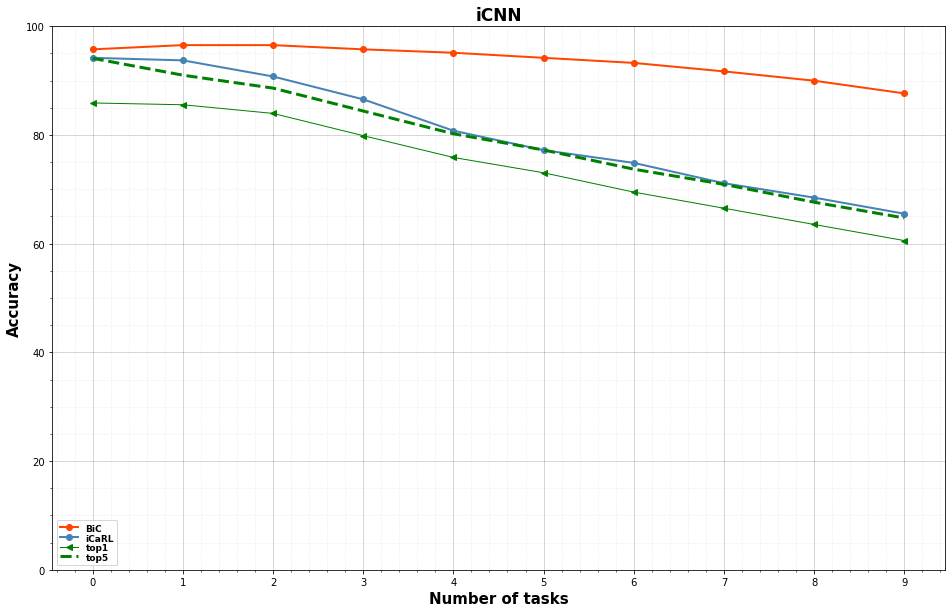

In [310]:
import matplotlib.pyplot as plt 
import numpy as np
import pickle
x = range(10)


icarl = [94.18181818181819, 93.71428571428572, 90.75324675324677, 86.54545454545456, 80.7792207792208, 77.1948051948052, 74.85714285714286, 71.11688311688312, 68.46753246753246, 65.50649350649351]
bic = [95.74025974025975, 96.51948051948054, 96.51948051948054, 95.74025974025975, 95.11688311688313, 94.18181818181819, 93.24675324675326, 91.6883116883117, 89.97402597402598, 87.63636363636364]

chunks = 20

plt.figure(figsize=(16,10))

plt.plot(x, bic,  "o-", linewidth=2, c="orangered", label="BiC")
plt.plot(x, icarl, "o-", linewidth=2, c="steelblue", label="iCaRL")


for i,p in enumerate(models_dic):
    z = np.zeros_like(icarl)
    z2 = np.zeros_like(icarl)
    ps = "models/" + "/".join(p[0].split("/")[1:])
    for j in range(len(icarl)):
        try:
            with open(ps + "/acc_task_test_"+str(j)+".pickle", 'rb') as handle:
                acc_task = pickle.load(handle)
            if(j==9):
                print([np.around(x,2) for x in acc_task.values()])

            z[j] = np.sum([acc_task[x] for x in range(j+1)])/(j+1)
            z2[j] = find_best(p[0], j)
        except Exception as e:
            pass
    plt.plot(x, z, p[3], linewidth=1, c = p[1], label="top1")
    plt.plot(x, z2, "--", linewidth=3, c = p[1], label="top5")
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([0,100])
plt.legend(loc='lower left',  ncol=1, handleheight=1.0, labelspacing=0.05, prop={'size': 9, "weight":"bold"})

plt.xlabel("Number of tasks", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy", fontweight='bold', fontsize=15)
plt.title("iCNN", fontweight='bold', fontsize=17) 
plt.xticks(range(10))
# plt.savefig("reptile.pdf")
plt.show()

94.093333,90.99,88.613333,84.398333,0.0,0.0,0.0,0.0,0.0,0.0
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/home/ubuntu/.conda/envs/virtualZ/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: loadtxt: Empty input file: "results/cifar100/meta2_celeb_T10_7/session_0_log.txt"
  


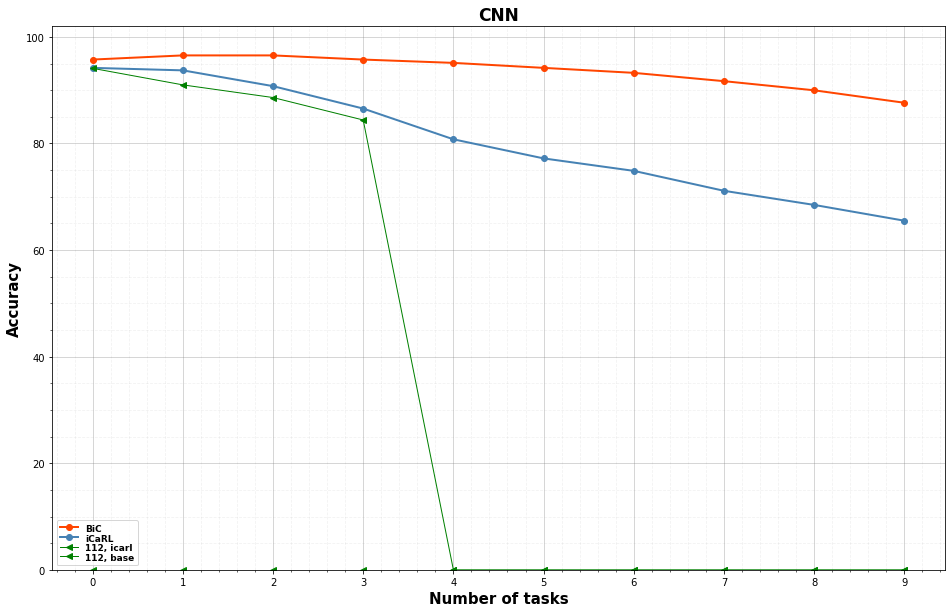

In [265]:
import matplotlib.pyplot as plt 
import numpy as np
x = range(10)
icarl = [94.18181818181819, 93.71428571428572, 90.75324675324677, 86.54545454545456, 80.7792207792208, 77.1948051948052, 74.85714285714286, 71.11688311688312, 68.46753246753246, 65.50649350649351]
bic = [95.74025974025975, 96.51948051948054, 96.51948051948054, 95.74025974025975, 95.11688311688313, 94.18181818181819, 93.24675324675326, 91.6883116883117, 89.97402597402598, 87.63636363636364]

chunks = 20

plt.figure(figsize=(16,10))

plt.plot(x, bic,  "o-", linewidth=2, c="orangered", label="BiC")
plt.plot(x, icarl, "o-", linewidth=2, c="steelblue", label="iCaRL")

for i,p in enumerate(models_dic):
    z = np.zeros_like(icarl)
    for j in range(len(icarl)):
        try:
            z[j] = find_best(p[0], j)

        except Exception as e:
#             print(e)
            pass

    plt.plot(x, z, p[3], linewidth=1, c = p[1], label=p[2])
    print(",".join([str(i) for i in z]) )
    
plt.grid(b=True, which='major', color='gray', linestyle='-', alpha=0.4)
plt.grid(b=True, which='minor', color='gray', linestyle='--', alpha=0.1)
plt.minorticks_on()

plt.ylim([0,102])
plt.legend(loc='lower left',  ncol=1, handleheight=1.0, labelspacing=0.05, prop={'size': 9, "weight":"bold"})

plt.xlabel("Number of tasks", fontweight='bold', fontsize=15)
plt.ylabel("Accuracy", fontweight='bold', fontsize=15)
plt.title("CNN", fontweight='bold', fontsize=17) 
plt.xticks(range(10))
# plt.savefig("reptile.pdf")
plt.show()

In [5]:
import scipy

def comb(a,b):
    aa = scipy.math.factorial(a)
    bb = scipy.math.factorial(b)
    ab = scipy.math.factorial(a-b)
    return aa/bb/ab

def binomial_prob(n,r,p):    
    if(n>=r):
        return comb(n,r)* (p**(r))* ((1-p)**(n-r))
    else:return 0


num_task = 10
total_num_class = 10000
class_per_task = total_num_class//num_task

for t in [9]:
    task = t
    ps = "results/cifar100/meta2_celeb_T10_7"
    
    task_samples = {0: 1000, 1: 1000, 2: 1000, 3: 1000, 4: 1000, 5: 1000, 6: 1000, 7: 1000, 8: 1000, 9: 1000}
    total_samples = np.sum([task_samples[x] for x in range(t+1)])

    with open("models/" + "/".join(ps.split("/")[1:]) + "/meta_task_test_list_"+str(t)+".pickle", 'rb') as handle:
        acc_task = pickle.load(handle)
    
    with open("models/" + "/".join(ps.split("/")[1:]) + "/acc_task_test_"+str(t)+".pickle", 'rb') as handle:
        acc_test = pickle.load(handle)
    
    range_acc = (max(acc_test.values())-min(acc_test.values()))/100
    p0 = np.mean(list(acc_test.values()))/100
    p0 = (p0 - range_acc/2)

    p0_hat = p0 + (1-p0)/((class_per_task*(t+1))-1)*(class_per_task-1)
    print(p0, p0_hat)
    found = 0
    for chunk in range(2,50):
        p = 0
        for j in range(max(2*(int(chunk/(task+1))),2),chunk):
            p += binomial_prob(chunk,j, p0_hat)
        if(p>=0.95):
            found = 1
            break
#         if(found == 1):       
#             break
    
    for chunks in [chunk]:
        correct = 0
        correct2= 0
        for tt in range(task+1):
            ctask_samples = np.sum([task_samples[x] for x in range(tt)])
            for class_id in range(task_samples[tt]//chunks):
                start_point = ctask_samples + class_id*chunks
                c, c2 = get_correct(acc_task, t, chunks, start_point, class_per_task)
                correct += c
                correct2 += c2
            
            new_chunk = task_samples[tt]-(class_id+1)*chunks
            if(new_chunk>0):
                start_point = ((task_samples[tt]//chunks)*chunks)
                c, c2 = get_correct(acc_task, t, new_chunk, start_point, class_per_task)
                correct += c
                correct2 += c2
    
    print("task = ", t, "\t", 
          "chunk = ", chunk, "\t", 
          "predicted accuracy = ", p, "\t", 
          "actual task accuracy = ", correct2/total_samples*100, "\t",
          "actual class accuracy = ", correct/total_samples*100, "\t",
         )



0.7264600000000008 0.7537893789378944


NameError: name 'get_correct' is not defined

In [9]:
t = 9
class_per_task = 10
range_acc = (max(list(acc_test.values()))-min(list(acc_test.values())))/100
p0 = np.mean(list(acc_test.values()))/100
# p0 = (p0 - 0.36*range_acc)
p0 = (p0 - range_acc*(1-np.exp(-1)))

p0_hat = p0 + (1-p0)/((class_per_task*(t+1))-1)*(class_per_task-1) 
print(p0, p0_hat, range_acc)

for chunk in range(2,50):
    p = 0
    for j in range(int(np.around(chunk/(task+1))+1),chunk+1):
#     for j in range(3,chunk+1):
        p += binomial_prob(chunk,j, p0_hat)
    print(p, chunk)
    if(p>=0.95):
        found = 1
        break

0.7200301328036777 0.7454819389124342 0.048666666666666455
0.9352205565802262 2
0.9835124616624674 3


In [327]:
def get_correct(acc_task, task, chunks, start_point, class_per_task):
    correct = 0
    correct2 = 0
    task_scores = []
    class_scores = []
    targets = []
    targets_pred = []
    for t in range(task+1):
        list_0 = []
        list_1 = []
        list_2 = []
        list_3 = []
        for i in range(chunks):
            acc_task_0 = acc_task[start_point + i]
            list_0.append(acc_task_0[t][0].detach().cpu().numpy())
            list_1.append(acc_task_0[t][1].detach().cpu().numpy())
            list_2.append(acc_task_0[t][2])
            list_3.append(acc_task_0[t][3].detach().cpu().numpy())
        list_0 = np.array(list_0)
        list_1 = np.array(list_1)
        list_2 = np.array(list_2)
        list_3 = np.array(list_3)

        targets_pred.append(list_0)
        class_scores.append(list_1)
        task_scores.append(list_2)
        targets.append(list_3)

    m = task_scores[0]
    task_scores2 = []
    for t2 in range(task+1):
        m2 = m[:,t2:(t2+1)]
        m3 = np.max(m2, 1)
        task_scores2.append(np.mean(m3))
    pred_task = np.argmax(task_scores2)  
    if(pred_task == targets[0][0]//class_per_task):
        correct2 += chunks
        for j in range(chunks):
            local_t = np.argmax(class_scores[pred_task][j])
            pred_x = [targets_pred[pred_task][j][local_t]]
            target_x = targets[0][j]
            if(target_x in pred_x+pred_task*class_per_task):
                correct += 1 
    return correct, correct2


class_per_task = 1000
for chunks in [3]:
    correct = 0
    correct2= 0
    for tt in range(task+1):
        ctask_samples = np.sum([task_samples[x] for x in range(tt)])
        for class_id in range(task_samples[tt]//chunks):
            start_point = ctask_samples + class_id*chunks
            c, c2 = get_correct(acc_task, t, chunks, start_point, class_per_task)
            correct += c
            correct2 += c2

        new_chunk = task_samples[tt]-(class_id+1)*chunks
        if(new_chunk>0):
            start_point = ((task_samples[tt]//chunks)*chunks)
            c, c2 = get_correct(acc_task, t, new_chunk, start_point, class_per_task)
            correct += c
            correct2 += c2

print("task = ", t, "\t", 
      "chunk = ", chunks, "\t", 
      "predicted accuracy = ", p, "\t", 
      "actual task accuracy = ", correct2/total_samples*100,
      "actual class accuracy = ", correct/total_samples*100
     )



task =  9 	 chunk =  3 	 predicted accuracy =  0.9861655246278767 	 actual task accuracy =  96.91 actual class accuracy =  85.31


In [108]:
a = np.load("results/cifar100/meta_twohead_1/seed.npy")
print(a)

7572
